# The Euler equations of gas dynamics

In this notebook, we discuss the equations and the structure of the exact solution to the Riemann problem.  In [Euler_approximate](Euler_approximate.ipynb) and [FV_compare](FV_compare.ipynb), we will investigate approximate Riemann solvers.

## Fluid dynamics

In this chapter we study the system of hyperbolic PDEs that governs the motions of a compressible gas in the absence of viscosity.  These consist of conservation laws for *mass, momentum*, and *energy*.  Together, they are referred to as the *compressible Euler equations*, or simply the Euler equations.  Our discussion here is fairly brief; for much more detail see <cite data-cite="fvmhp"><a href="riemann.html#fvmhp">(LeVeque, 2002)</a></cite> or <cite data-cite="toro2013riemann"><a href="riemann.html#toro2013riemann">(Toro, 2013)</a></cite>.

### Mass conservation

We will use $\rho(x,t)$ to denote the fluid density and $u(x,t)$ for its velocity.  Then the equation for conservation of mass is just the familiar *continuity equation*:

$$\rho_t + (\rho u)_x = 0.$$

### Momentum conservation

We discussed the conservation of momentum in a fluid already in [Acoustics](Acoustics.ipynb).  For convenience, we review the ideas here.  The momentum density is given by the product of mass density and velocity, $\rho u$.  The momentum flux has two components.  First, the momentum is transported in the same way that the density is; this flux is given by the momentum density times the velocity: $\rho u^2$.

To understand the second term in the momentum flux, we must realize that a fluid is made up of many tiny molecules.  The density and velocity we are modeling are average values over some small region of space.  The individual molecules in that region are not all moving with exactly velocity $u$; that's just their average.  Each molecule also has some additional random velocity component.  These random velocities are what accounts for the *pressure* of the fluid, which we'll denote by $p$.  These velocity components also lead to a net flux of momentum.  Thus the momentum conservation equation is

$$(\rho u)_t + (\rho u^2 + p)_x = 0.$$

This is very similar to the conservation of momentum equation in the shallow water equations, as discussed in [Shallow_water](Shallow_water.ipynb), in which case $hu$ is the momentum density and $\frac 1 2 gh^2$ is the hydrostatic pressure.  For gas dynamics, a different expression must be used to compute the pressure $p$ from the conserved quantities.  This relation is called the *equation of state* of the gas, as discussed further below.

### Energy conservation

The energy has two components: internal energy density $\rho e$ and kinetic energy density $\rho u^2/2$:

$$E = \rho e + \frac{1}{2}\rho u^2.$$

Like the momentum flux, the energy flux involves both bulk transport ($Eu$) and transport due to pressure ($pu$):

$$E_t + (u(E+p))_x = 0.$$

### Equation of state

You may have noticed that we have 4 unknowns (density, momentum, energy, and pressure) but only 3 conservation laws.  We need one more relation to close the system.  That relation, known as the equation of state, expresses how the pressure is related to the other quantities.  We'll focus on the case of a polytropic ideal gas, for which

$$p = \rho e (\gamma-1).$$

Here $\gamma$ is the ratio of specific heats, which for air is approximately 1.4.

## Hyperbolic structure of the 1D Euler equations

We can write the three conservation laws as a single system $q_t + f(q)_x = 0$ by defining  
$$
\begin{aligned}
q & = \begin{pmatrix} \rho \\ \rho u \\ E\end{pmatrix}, & 
f(q) & = \begin{pmatrix} \rho u \\ \rho u^2 + p \\ u(E+p)\end{pmatrix}.
\end{aligned}  
$$
These are the one-dimensional Euler system. As usual, one can define the $3 \times 3$ Jacobian matrix by differentiating this flux function with respect to the three components of $q$.

In our discussion of the structure of these equations, it is convenient to work with the primitive variables $(\rho, u, p)$ rather than the conserved variables.  The quasilinear form is particularly simple in the primitive variables:  
$$
\begin{aligned}
\begin{bmatrix} \rho \\ u \\ p \end{bmatrix}_t + 
\begin{bmatrix} u & \rho & 0 \\ 0 & u & 1/\rho \\ 0 & \gamma \rho & u \end{bmatrix} \begin{bmatrix} \rho \\ u \\ p \end{bmatrix}_x & = 0.
\end{aligned}
$$

### Characteristic velocities
The eigenvalues of the flux Jacobian $f'(q)$ for the 1D Euler equations are:

\begin{align}
\lambda_1 & = u-c & \lambda_2 & = u & \lambda_3 & = u+c
\end{align}

Here $c$ is the sound speed:

$$ c = \sqrt{\frac{\gamma p}{\rho}}.$$

These are also the eigenvalues of the coefficient matrix appearing in (\ref{euler_primitive}), and show that acoustic waves propagate at speeds $\pm c$ relative to the fluid velocity $u$. There is also a characteristic speed $\lambda_2 =u$ corresponding to the transport of entropy at the fluid velocity, as discussed further below.

The eigenvectors of the coefficient matrix appearing in (\ref{euler_primitive}) are:
$$
\begin{aligned}
r_1 & = \begin{bmatrix} -\rho/c \\ 1 \\ - \rho c \end{bmatrix} &
r_2 & = \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} &
r_3 & = \begin{bmatrix}  \rho/c \\ 1 \\ \rho c \end{bmatrix}.
\end{aligned}
$$

These vectors show the relation between jumps in the primitive variables across waves in each family.  The eigenvectors of the flux Jacobian $f'(q)$ arising from the conservative form (\ref{euler_conserved})  would be different, and would give the relation between jumps in the conserved variables across each wave.

Notice that the second characteristic speed, $\lambda_2$, depends only on $u$ and that $u$ does not change as we move in the direction of $r_2$.  In other words, the 2-characteristic velocity is constant on 2-integral curves.  This is similar to the wave that carries changes in the tracer that we considered in [Shallow_tracer](Shallow_tracer.ipynb).  We say this characteristic field is *linearly degenerate*; it admits neither shocks nor rarefactions.  In a simple 2-wave, all characteristics are parallel.  A jump in this family carries a change only in the density, and is referred to as a *contact discontinuity*.

Mathematically, the $p$ th field is linearly degenerate if
$$
\begin{aligned}
\nabla \lambda_p(q) \cdot r_p(q) = 0,
\end{aligned}
$$
since in this case the eigenvalue $\lambda_p(q)$ does not vary in the direction of the eigenvector $r_p(q)$, and hence is constant along integral curves of this family. (Recall that $r_p(q)$ is the tangent vector at each point on the integral curve.)

The other two fields have characteristic velocities that *do* vary along the corresponding integral curves. Moreover they vary in a monotonic manner as we move along an integral curve, always increasing as we move in one direction, decreasing in the other.  Mathematically, this means that 
$$
\begin{aligned}
\nabla \lambda_p(q) \cdot r_p(q) \ne 0
\end{aligned}
$$
as $q$ varies, so that the directional derivative of $\lambda_p(q)$ cannot change sign as we move along the curve.  This is analogous to the flux for a scalar problem being convex, and means that the 1-wave and the 3-wave in any Riemann solution to the Euler equations will be a single shock or rarefaction wave, not the sort of compound waves we observed in [Nonconvex_scalar](Nonconvex_scalar.ipynb) in the nonconvex scalar case.  Any characteristic field satisfying (\ref{gennonlin}) is said to be *genuinely nonlinear*.

### Entropy

Another important quantity in gas dynamics is the *specific entropy*:

$$ s = c_v \log(p/\rho^\gamma) + C,$$

where $c_v$ and $C$ are constants. From the expression (\ref{euler_evecs}) for the eigenvector $r_2$, we see that the pressure and velocity are constant across a 2-wave.
A simple 2-wave is also called an *entropy wave* because a variation in density while the pressure remains constant requires a variation in the entropy of the gas as well.  On the other hand a simple acoustic wave (a continuously varying pure 1-wave or 3-wave) has constant entropy throughout the wave; the specific entropy is a Riemann invariant for these families.  

A shock wave (either a 1-wave or 3-wave) satisfies the Rankine-Hugoniot conditions and exhibits a jump in entropy.  To be physically correct, the entropy of the gas must *increase* as gas molecules pass through the shock, leading to the *entropy condition* for selecting shock waves.  We have already seen this term used in the context of scalar nonlinear equations and shallow water flow.  The use of the term in other hyperbolic systems is based on analogy with its use here, where it corresponds to the physical entropy.

### Riemann invariants

Since the Euler equations have three components, we expect each integral curve (a 1D set in 3D space) to be defined by two Riemann invariants.  These are:

\begin{align}
1 & : s, u+\frac{2c}{\gamma-1} \\
2 & : u, p \\
3 & : s, u-\frac{2c}{\gamma-1}.
\end{align}

### Integral curves

The level sets of these Riemann invariants are two-dimensional surfaces; the intersection of two appropriate level sets defines an integral curve.

The 2-integral curves, of course, are simply lines of constant pressure and velocity (with varying density).  Since the field is linearly degenerate, these coincide with the Hugoniot loci.
We can determine the form of the 1- and 3-integral curves using the Riemann invariants above.  For a curve passing through $(\rho_0,u_0,p_0)$, we find

\begin{align}
    \rho(p) &= (p/p_0)^{1/\gamma} \rho_0,\\
    u(p) & = u_0 \pm \frac{2c_0}{\gamma-1}\left(1-(p/p_0)^{(\gamma-1)/(2\gamma)}\right).
\end{align}
Here the plus sign is for 1-waves and the minus sign is for 3-waves.

Below we plot the projection of some integral curves on the $p-u$ plane.

In [74]:
%matplotlib inline

In [75]:
%config InlineBackend.figure_format = 'svg'
from exact_solvers import euler
from exact_solvers import euler_demos
from ipywidgets import widgets
from ipywidgets import interact
State = euler.Primitive_State
gamma = 1.4

If you wish to examine the Python code for this chapter, see:

- [exact_solvers/euler.py](exact_solvers/euler.py) ...
   [on github,](https://github.com/clawpack/riemann_book/blob/FA16/exact_solvers/euler.py)
- [exact_solvers/euler_demos.py](exact_solvers/euler_demos.py) ...
   [on github.](https://github.com/clawpack/riemann_book/blob/FA16/exact_solvers/euler_demos.py)

In [76]:
interact(euler.plot_integral_curves,
         gamma=widgets.FloatSlider(min=1.1,max=3,value=1.4),
         rho_0=widgets.FloatSlider(min=0.1,max=3.,value=1., 
                                   description=r'$\rho_0$'));

interactive(children=(Checkbox(value=True, description='plot_1'), Checkbox(value=False, description='plot_3'),…

## Rankine-Hugoniot jump conditions

The Hugoniot loci for 1- and 3-shocks are
\begin{align}
    \rho(p) &= \left(\frac{1 + \beta p/p_0}{p/p_\ell + \beta} \right),\\
    u(p) & = u_0 \pm \frac{2c_0}{\sqrt{2\gamma(\gamma-1)}} 
        \left(\frac{1-p/p_0}{\sqrt{1+\beta p/p_0}}\right), \\
\end{align}
where $\beta = (\gamma+1)/(\gamma-1)$.
Here the plus sign is for 1-shocks and the minus sign is for 3-shocks.

Below we plot the projection of some Hugoniot loci on the $p-u$ plane.

In [77]:
interact(euler.plot_hugoniot_loci,
         gamma=widgets.FloatSlider(min=1.1,max=3,value=1.4),
         rho_0=widgets.FloatSlider(min=0.1,max=3.,value=1., 
                                   description=r'$\rho_0$'));

interactive(children=(Checkbox(value=True, description='plot_1'), Checkbox(value=False, description='plot_3'),…

### Entropy condition

As mentioned above, a shock wave is physically relevant only if the entropy of the gas increases as the gas particles move through the shock.  A discontinuity satisfying the Rankine-Hugoniot jump conditions that violates this entropy condition (an "entropy-violating shock") is not physically correct and should be replaced by a rarefaction wave in the Riemann solution.  

This physical entropy condition is equivalent to the mathematical condition that for a 1-shock to be physically relevant, the 1-characteristics must impinge on the shock (the Lax entropy condition). If the entropy condition is violated, the 1-characteristics would spread out, allowing the insertion of an expansion fan (rarefaction wave).

## Exact solution of the Riemann problem

The general Riemann solution is found following the steps listed below.  This is essentially the same procedure used to determine the correct solution to the Riemann problem for the shallow water equations in [Shallow_water](Shallow_water.ipynb), where more details are given.

The Euler equations are a system of three equations and the general Riemann solution consists of three waves, so we must determine two intermediate states rather than the one intermediate state in the shallow water equations.  However, it is nearly as simple because of the fact that we know the pressure and velocity are constant across the 2-wave, and so there is a single intermediate pressure $p_m$ and velocity $u_m$ in both intermediate states, and it is only the density that takes different values $\rho_{m1}$ and $\rho_{m2}$.  Moreover any jump in density is allowed across the 2-wave, and we have expressions given above for how $u(p)$ varies along any integral curve or Hugoniot locus, expressions that do not explicitly involve $\rho$.  So we can determine the intermediate $p_m$ by finding the intersection point of two relevant curves, in step 3 of this general algorithm:

1. Define a piecewise function giving the middle state velocity $u_m$ that can be connected to the left state by an entropy-satisfying shock or rarefaction, as a function of the middle-state pressure $p_m$.
2. Define a piecewise function giving the middle state velocity $u_m$ that can be connected to the right state by an entropy-satisfying shock or rarefaction, as a function of the middle-state pressure $p_m$.
3. Use a nonlinear rootfinder to find the intersection of the two functions defined above.
4. Use the Riemann invariants to find the intermediate state densities and the solution structure inside any rarefaction waves.

Step 4 above requires finding the structure of rarefaction waves.  This can be done using the the fact that the Riemann invariants are constant through the rarefaction wave.  See Chapter 14 of <cite data-cite="fvmhp"><a href="riemann.html#fvmhp">(LeVeque, 2002)</a></cite> for more details.  

## Examples of Riemann solutions

Here we present some representative examples of Riemann problems and solutions.  The examples chosen are closely related to the examples used in [Shallow_water](Shallow_water.ipynb) and you might want to refer back to that notebook and compare the results. 

### Problem 1: Sod shock tube

First we consider the classic shock tube problem. The initial condition consists of high density and pressure on the left, low density and pressure on the right and zero velocity on both sides. The solution is composed of a shock propagating to the right (3-shock), while a left-going rarefaction forms (1-rarefaction). In between these two waves, there is a jump in the density, which is the contact discontinuity (2-wave) in the linearly degenerate characteristic field.  

Note that this set of initial conditions is analogous to the "dam break" problem for shallow water quations, and the resulting structure of the solution is very similar to that obtained when those equations are solved with the addition of a scalar tracer.  However, in the Euler equations the entropy jump across a 2-wave does affect the fluid dynamics on either side, so this is not a passive tracer and solving the Riemann problem is slightly more complex.

In [78]:
left_state  = State(Density = 3.,
                    Velocity = 0.,
                    Pressure = 3.)
right_state = State(Density = 1.,
                    Velocity = 0.,
                    Pressure = 1.)

euler.riemann_solution(left_state,right_state)

interactive(children=(FloatSlider(value=0.5, description='t', max=0.9), Dropdown(description='Show characteris…

Here is a plot of the solution in the phase plane, showing the integral curve connecting the left and middle states, and the Hugoniot locus connecting the middle and right states.

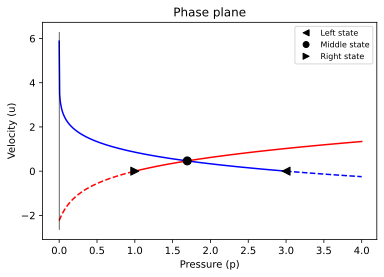

In [79]:
euler.phase_plane_plot(left_state, right_state)

### Problem 2: Symmetric expansion

Next we consider the case of equal densities and pressures, and equal and opposite velocities, with the initial states moving away from each other.  The result is two rarefaction waves (the contact has zero strength).

In [80]:
left_state  = State(Density = 1.,
                    Velocity = -3.,
                    Pressure = 1.)
right_state = State(Density = 1.,
                    Velocity = 3.,
                    Pressure = 1.)

euler.riemann_solution(left_state,right_state);

interactive(children=(FloatSlider(value=0.5, description='t', max=0.9), Dropdown(description='Show characteris…

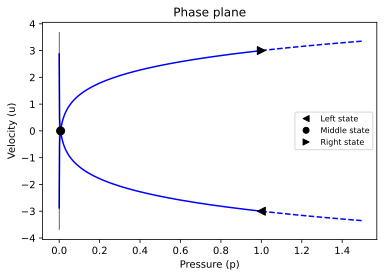

In [81]:
euler.phase_plane_plot(left_state, right_state)

### Problem 3: Colliding flows

Next, consider the case in which the left and right states are moving toward each other.  This leads to a pair of shocks, with a high-density, high-pressure state in between.

In [82]:
left_state  = State(Density = 1.,
                    Velocity = 3.,
                    Pressure = 1.)
right_state = State(Density = 1.,
                    Velocity = -3.,
                    Pressure = 1.)

euler.riemann_solution(left_state,right_state)

interactive(children=(FloatSlider(value=0.5, description='t', max=0.9), Dropdown(description='Show characteris…

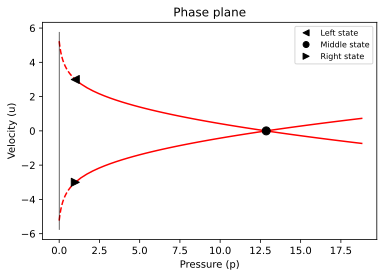

In [83]:
euler.phase_plane_plot(left_state, right_state)

## Plot particle trajectories

In the next plot of the Riemann solution in the $x$-$t$ plane, we also plot the trajectories of a set of particles initially distributed along the $x$ axis at $t=0$, with the spacing inversely proportional to the density.  The evolution of the distance between particles gives an indication of how the density changes.

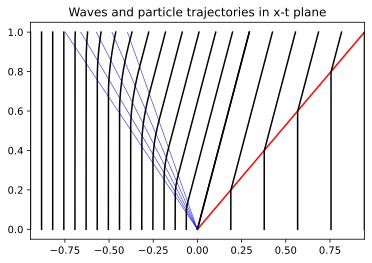

In [ ]:
left_state  = State(Density = 3.,
                    Velocity = 0.,
                    Pressure = 3.)
right_state = State(Density = 1.,
                    Velocity = 0.,
                    Pressure = 1.)

euler.plot_riemann_trajectories(left_state, right_state)

Since the distance between particles in the above plot is inversely proportional to density, we see that the density around a particle increases as it goes through the shock wave but decreases through the rarefaction wave, and that in general there is a jump in density across the contact discontinuity, which lies along the particle trajectory emanating from $x=0$ at $t=0$.

## Riemann solution with a colored tracer

Next we plot the Riemann solution with the density plot also showing an advected color to help visualize the flow better. The fluid initially to the left of $x=0$ is colored red and that initially to the right of $x=0$ is colored blue, with stripes of different shades of these colors to help visualize the motion of the fluid.

Let's plot the Sod shock tube data with this colored tracer:

In [84]:
def plot_with_stripes_t_slider(t):
    euler_demos.plot_with_stripes(rho_l=3.,u_l=0.,p_l=3.,
                                  rho_r=1.,u_r=0.,p_r=1.,
                                  gamma=gamma,t=t)
    
interact(plot_with_stripes_t_slider, 
         t=widgets.FloatSlider(min=0.,max=1.,step=0.1,value=0.5));

interactive(children=(FloatSlider(value=0.5, description='t', max=1.0), Output()), _dom_classes=('widget-inter…

Note the following in the figure above:

 - The edges of each stripe are being advected with the fluid velocity, so you can visualize how the fluid is moving.
 - The width of each stripe initially is inversely proportional to the density of the fluid, so that the total mass of gas within each stripe is the same.
 - The total mass within each stripe remains constant as the flow evolves, and the width of each stripe remains inversely proportional to the local density.
 - The interface between the red and blue gas moves with the contact discontinuity.  The velocity and pressure are constant but the density can vary across this wave.

## Interactive Riemann solver

The initial configuration specified below gives a rather different looking solution than when using initial conditions of Sod, but with the same mathematical structure. *In the live notebook, you can easily adjust the initial data and immediately see the resulting solution.*

In [85]:
euler_demos.euler_demo1(rho_l=2.,u_l=0.,p_l=2.5,
                        rho_r=3.,u_r=0.,p_r=5., gamma=gamma)

interactive(children=(FloatSlider(value=2.0, description='$\\rho_l$', max=10.0, min=1.0), FloatSlider(value=0.…

Output()

## Riemann problems with vacuum
A vacuum state (with zero pressure and density) in the Euler equations is similar to a dry state (with depth $h=0$) in the shallow water equations.  It can arise in the solution of the Riemann problem in two ways:

1. An initial left or right vacuum state: in this case the Riemann solution consists of a single rarefaction, connecting the non-vacuum state to vacuum.
2. A problem where the left and right states are not vacuum but middle states are vacuum.  Since this means the middle pressure is smaller than that to the left or right, this can occur only if the 1- and 3-waves are both rarefactions.  These rarefactions are precisely those required to connect the left and right states to the middle vacuum state. 

### Initial vacuum state
Next we start with the density and pressure set to 0 in the left state. The velocity plot looks a bit strange, but note that the velocity is undefined in vacuum.  The solution structure consists of a rarefaction wave, similar to what is observed in the analogous case of a dam break problem with dry land on one side (depth $=0$), as discussed in [Shallow_water](Shallow_water.ipynb).

In [86]:
left_state  = State(Density =0.,
                    Velocity = 0.,
                    Pressure = 0.)
right_state = State(Density = 1.,
                    Velocity = -3.,
                    Pressure = 1.)

euler.riemann_solution(left_state,right_state)

interactive(children=(FloatSlider(value=0.5, description='t', max=0.9), Dropdown(description='Show characteris…

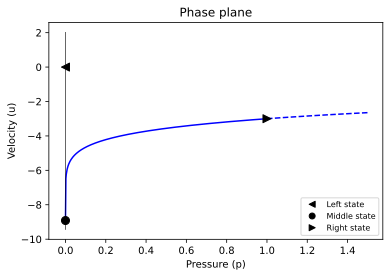

In [87]:
euler.phase_plane_plot(left_state, right_state)

### Middle vacuum state

Finally, we consider an example where there is sufficiently strong outflow ($u_\ell<0$ and $u_r>0$) that a vacuum state forms, analogous to the dry state that appears in the similar example in [Shallow_water](Shallow_water.ipynb).

In [88]:
left_state  = State(Density =1.,
                    Velocity = -10.,
                    Pressure = 1.)
right_state = State(Density = 1.,
                    Velocity = 10.,
                    Pressure = 1.)

euler.riemann_solution(left_state,right_state)

interactive(children=(FloatSlider(value=0.5, description='t', max=0.9), Dropdown(description='Show characteris…

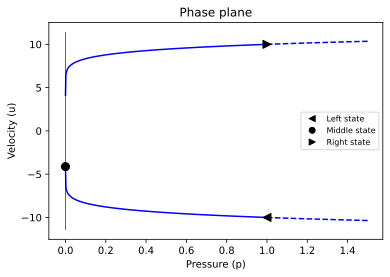

In [89]:
euler.phase_plane_plot(left_state, right_state)

Again the phase plane plot may look odd, but since the velocity is undefined in the vacuum state the middle state with $p_m = 0$ actually connects to both integral curves, which correspond to the two outgoing rarefaction waves.